# ===Recap===

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
boston = load_boston()
sns.set_style('whitegrid')

In [2]:
data = DataFrame(boston.data,columns=boston.feature_names)
data['PRICE'] = boston.target


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


[]

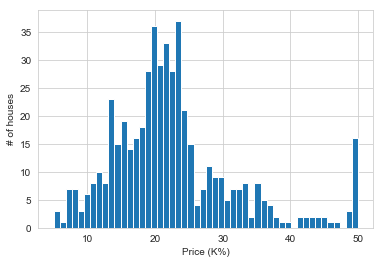

In [9]:
plt.hist(data.PRICE,bins=50)
plt.xlabel('Price (K%)')
plt.ylabel('# of houses')
plt.plot()

C:\Users\kinar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


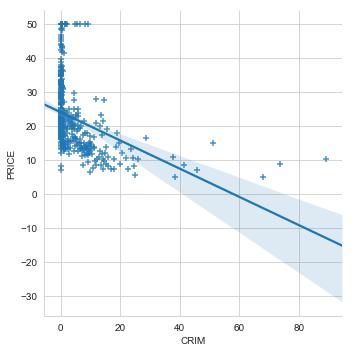

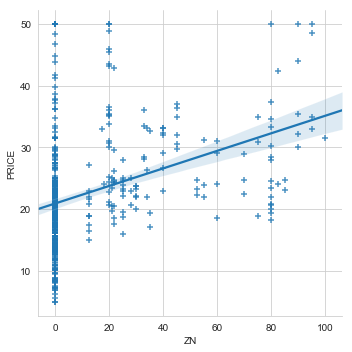

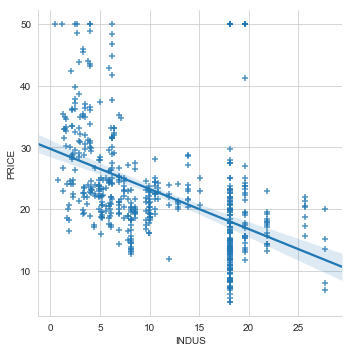

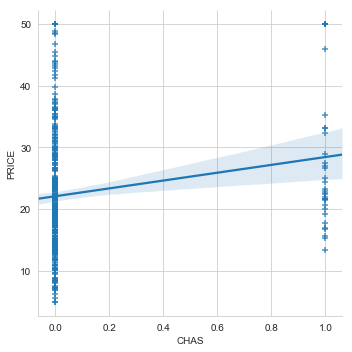

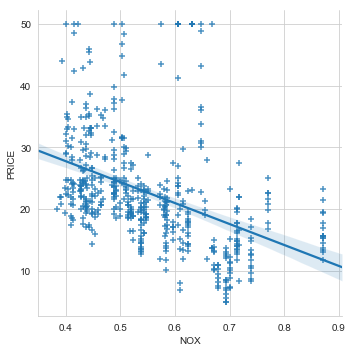

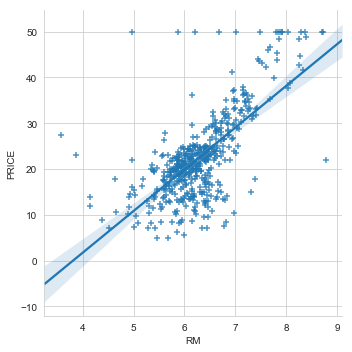

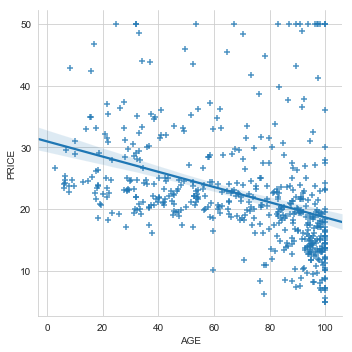

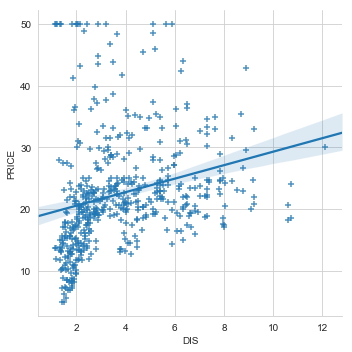

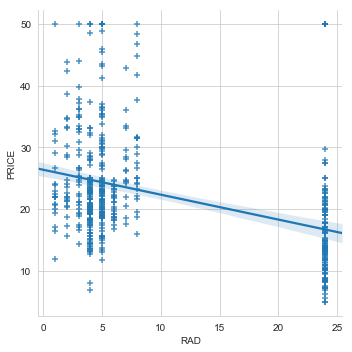

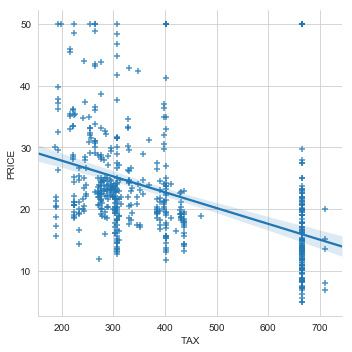

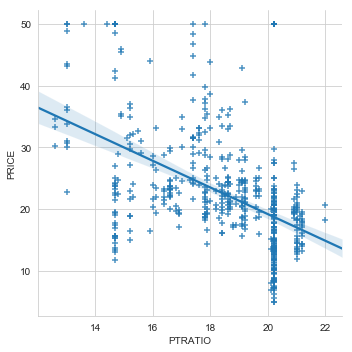

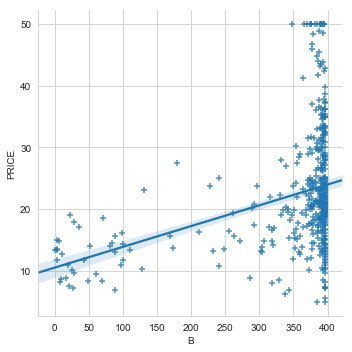

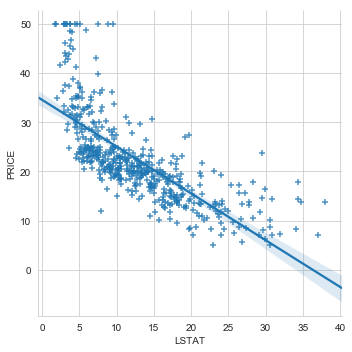

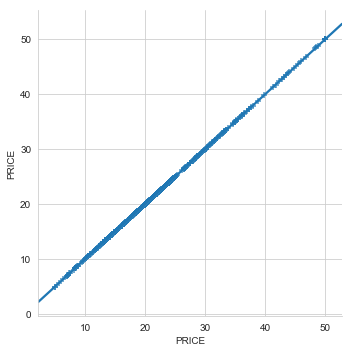

In [16]:
for col in data.columns:
    sns.lmplot(col,'PRICE',data=data,markers='+')

In [17]:
lreg = LinearRegression()

In [18]:
lreg.fit(data.drop('PRICE',1),data.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
data_coef = DataFrame(lreg.coef_,columns=[['coef']])
data_coef['features'] = data.columns[:-1]
data_coef

,coef,features
0,-0.108011,CRIM
1,0.046420,ZN
2,0.020559,INDUS
3,2.686734,CHAS
4,-17.766611,NOX
5,3.809865,RM
6,0.000692,AGE
7,-1.475567,DIS
8,0.306049,RAD
9,-0.012335,TAX


In [147]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [218]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(poly.fit_transform(data.drop(['ZN','INDUS','AGE','TAX','B','PRICE'],1)), data.PRICE)
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(poly.fit_transform(data.drop('PRICE',1)), data.PRICE)

In [223]:
lreg.fit(Xtrain,Ytrain)
lreg.coef_

array([-7.09874318e+10,  2.68232769e+00,  2.72742809e+01, -1.41656403e+02,
        1.80623152e+01, -1.34309861e+01,  1.71136917e+00,  3.12031870e+00,
       -3.80418943e-01,  1.89483118e-04,  2.05267496e+00, -1.61634095e+00,
        1.90094117e-01, -5.79906880e-03,  3.46474479e-02, -2.09193785e-01,
        2.54026542e-02,  2.72742809e+01, -2.89767454e+01, -4.17595874e+00,
        2.72725603e-01, -7.53112002e-03, -6.20500092e-01, -2.05574199e-01,
        7.36065121e+01, -3.55614651e+00,  6.64738338e+00, -6.29705349e-01,
        2.67878446e+00, -1.29173948e-01,  2.61476030e-01,  3.77910288e-01,
       -2.89031652e-01, -6.66362523e-01, -1.09959518e-01,  2.45936799e-01,
       -9.50442151e-02,  2.21141567e-01,  8.45063632e-02, -1.75759041e-02,
        9.21792870e-02, -3.94790656e-02, -6.18646417e-02,  1.39823867e-03,
        2.13502535e-02])

In [225]:
lreg.score(Xtrain,Ytrain)

0.8990493307466451

In [227]:
lreg.score(Xtest,Ytest)

0.831932430636802

In [255]:
lreg.predict(Xtest)

array([14.03973389,  9.83859253, 32.62443542, 17.76794434, 24.95445251,
       23.00537109, 19.48040771, 23.77609253, 34.00154114, 16.5115509 ,
       28.08721924, 21.48493958, 14.64675903, 49.33755493, 20.75746155,
       25.55786133, 13.62887573, 14.44815063, 15.96136475, 20.60551453,
       26.72689819, 16.74621582, 20.43598938, 15.32626343, 21.21713257,
       50.71813965, 10.73027039, 26.42749023, 17.68197632, 15.95040894,
       19.94564819, 23.1652832 , 23.5881958 , 21.89857483, 36.01557922,
       25.53440857, 19.00639343, 11.57119751, 19.70605469, 25.96784973,
       29.18058777, 17.5246582 , 16.3993988 , 13.93652344, 18.55271912,
       15.10461426, 32.71144104, 36.16423035, 17.37893677, 14.18984985,
       37.39135742, 16.07185364, 18.51211548, 22.94329834, 14.62934875,
       17.42103577,  8.5380249 , 33.71766663, 27.26979065, 33.91723633,
       41.64753723, 26.75192261, 22.73097229, 17.940979  , 24.54252625,
       24.41740417, 33.01312256, 18.7986145 , 21.84358215, 13.59